# The Cournot model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

In this model project, we consider the Cournot model, known from microeconomics. It is a model of industrial organization. In the model are two frims that compete on quantities. We start off by considering a symmetric game, where the firms have identical cost functions. The game is solved using backwards induction, which means that we start of by maximizing the profit of the market follower, defined as firm 2, whereafter we maximize the profit of firm 1.

The project first solve the model analytically, whereafter the model is solved using a numerical model

Imports and set magics:

In [92]:
import numpy as np
from scipy import optimize
import sympy as sm
import pandas as pd
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Defining symbols that are used during the project.

In [107]:
q1 = sm.symbols('q_1') # The quantities of firm 1 
q2 = sm.symbols('q_2') # The quantities of firm 2
P = sm.symbols('P') # The price that the firms charge for their products
a = sm.symbols('a') # A part of the inverse demand function
c1 = sm.symbols('c_1') # The production cost of firm 1 
c2 = sm.symbols('c_2') # The production cost of firm 2
optq2 = sm.symbols('q_2^*') # The optimal quantity of firm 1 
optq1 = sm.symbols('q_1^*') # The optimal quantity of firm 2 

For later use, we start of by defining the price function, also known as the inverse demand function.

In [108]:
def price(a, q1,q2): 
    return a-q1 -q2

In [109]:
price(a, q1,q2)

a - q_1 - q_2

Now we define the two profit functions, notice that in the profits depend on the amount the other firm produces, further it can be seen that the profit functions are identical. 

In [110]:
def profit1(q1):
    return (a-q1-q2) * q1 - c1 * q1 

def profit2(q2):
    return (a-q1-q2) * q2 - c2 * q2

In [111]:
profit2(q2)

-c_2*q_2 + q_2*(a - q_1 - q_2)

In [112]:
profit1(q1)

-c_1*q_1 + q_1*(a - q_1 - q_2)

We start off considering the second firm , and maximize the profit of firm 2 with respect to the quantity of firm 2.

In [113]:
maxprofit2 = sm.diff(profit2(q2), q2)
maxprofit2

a - c_2 - q_1 - 2*q_2

And then we solve for q2, as we then have the best response for firm 2 to the quantity that firm 1 produces.

In [114]:
optq2 = sm.solve(maxprofit2,q2)
optq2[0]

a/2 - c_2/2 - q_1/2

In [115]:
brq2 = a/2 -c2/2 + q1/2

We will now do the same for the for firm 1. 

In [116]:
sm.diff( q1*(a-(q2)-q1)-c1*q1 ,q1)

a - c_1 - 2*q_1 - q_2

We now solve for the quantity of firm 1, where it can be seen that there are symmetry between the two firms. 

In [117]:
solve = sm.solve(a-c1-2*q1-q2,q1)
solve[0]

a/2 - c_1/2 - q_2/2

We now insert the quantity of firm 1 into the best response of firm 2, and solve for q2, which gives the optimal amount of q2.

In [122]:
solve2 = sm.solve(a/2 - c2/2 - (a/2 - c1/2 - q2/2)/2-q2,q2)
solve2[0]

a/3 + c_1/3 - 2*c_2/3

As we know that the two firms are symmetric, we now know the optimal quantity of firm 1 is similar to the optimal quantity of firm 2. 

In [64]:
q2 = a/3 - 2*c1/3 +c2/3

In [65]:
q1 = a/3 - 2*c2/3 +c1/3

Thus we have now fonund the optimal quantities of each firm. 

We can now compare the profits of the two firms. In order to do this, we define some values for a and the marginal cost of each firm.

In [66]:
a=100
c1=10
c2=10

We now define the quantities that each firm produce, given the defined values above.

In [67]:
q1 = 100/3 +10/3 - (2*10)/3

In [68]:
q2 = 100/3 +10/3 - (2*10)/3

Given the quantities, we can now see what the price is, how much each firm will produce and the profit of each firm.

In [69]:
print(f'The market price is {round(price(a,q1,q2),1)}')
print(f'The profit of firm 1 is {round(profit1(q1),1)}')
print(f'The quantitiy of firm 1 is {round(q1,1)}')
print(f'The profit of firm 2 is {round(profit2(q2),1)}')
print(f'The quantitiy of firm 2 is {round(q2,1)}')

The market price is 40.0
The profit of firm 1 is 900.0
The quantitiy of firm 1 is 30.0
The profit of firm 2 is 900.0
The quantitiy of firm 2 is 30.0


## Numerical solution

In this section we solve the cournot model by using a numerical model. 

In [70]:
N = 999 # Number of exogenous drawn quantities for firm 2
q2_vector = np.linspace(0,90,N) # Quantities actually getting drawn, thus we draw between quantities for q2 between 0 and 90, and draw 999 values between 0 and 90.

In [71]:
# defining empty vectors
q2_try= [] 
q1_BR = []
pi1_BR = [] 

for i in q2_vector:
    q2 = i # sets the value of q2 equal to i
    q1_guess = 0 # Initial guess for q1      
    objective_function = lambda q1: -profit1(q1) # We want to maximize the profit of firm 1, and have "-", as the function minimizes, we find the profits of firm 1 given the values of firm 2, and find the optimal quantity of q1
    res = optimize.minimize(objective_function, q1_guess, method='BFGS')
    q2_try.append(i) # Append the value of q2
    q1_BR.append(res.x[0]) # Append the best respone quantity

In [72]:
df=pd.DataFrame(q2_try) 
df.columns=['q2'] 
df['q1'] = q1_BR 
df['Price'] = a - df['q1'] - df['q2'] # Calculate the price given the quantities of firm 1 and firm 2
df['Profit_1'] = np.transpose(df['Price'] * df['q1']) - c2 * df['q1'] # Calculate the profit of firm 1
df['Profit_2'] = np.transpose(df['Price'] * df['q2']) - c2 * df['q2'] # Calculate the profit of firm 2

df = df.round(1)
df.head(1000)

,q2,q1,Price,Profit_1,Profit_2
0,0.0,45.0,55.0,2025.0,0.0
1,0.1,45.0,55.0,2020.9,4.1
2,0.2,44.9,54.9,2016.9,8.1
3,0.3,44.9,54.9,2012.8,12.1
4,0.4,44.8,54.8,2008.8,16.2
...,...,...,...,...,...
994,89.6,0.2,10.2,0.0,16.2
995,89.7,0.1,10.1,0.0,12.1
996,89.8,0.1,10.1,0.0,8.1
997,89.9,0.0,10.0,0.0,4.1


In [73]:
q1_exo=df['q2'].copy() # Copying exogenous drawn quantities from firm 1 to firm 2
q2_BR=df['q1'].copy() # Copying best response from firm 2 to firm 1

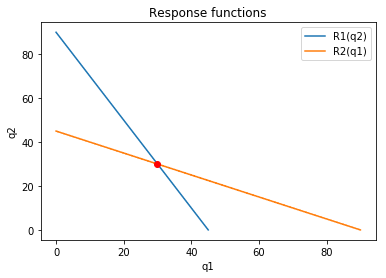

In [77]:
# Plots the responses of each firm, for different values of the other quantity.

plt.plot(q1_BR[0:999], q1_exo[0:999], label='R1(q2)') # Blue line
plt.plot(df['q2'][0:999],df['q1'][0:999], label='R2(q1)') # Orange line
plt.plot([30],[30],'ro') # Red dot
plt.xlabel('q1')
plt.ylabel('q2')
plt.title('Response functions')
plt.legend()
plt.show()

Where it can be seen that the larger the quantity is for firm 1, the lower will the quantity of firm 2 will be. The red dot represents the optimal quantity found in the analytical solution. , 

In [80]:
for i in range(N): 
    if df['q2'][i] == df['q1'][i]: # Finds the value where the quantity of firm 1 and firm 2 intersect
        profits1 = df['Profit_1'][i] # Define the profits of firm 1, given the intersect
        profits2 = df['Profit_2'][i] 
        price = df['Price'][i] # Defines the price given the quantities in the intersect
        optimal_quantity1 = df['q1'][i] # Defining the quantities given the intersect
        optimal_quantity2 = df['q2'][i]        

We can now check that the quantity and profits in the Numerical solution compared to the analytical solution. 

In [76]:
print(f'The market price is {round(price,1)}')
print(f'The profit of firm 1 is {round(profits1,1)}')
print(f'The quantitiy of firm 1 is {round(optimal_quantity1,1)}')
print(f'The profit of firm 2 is {round(profits2,1)}')
print(f'The quantitiy of firm 2 is {round(optimal_quantity2,1)}')

The market price is 40.0
The profit of firm 1 is 899.1
The quantitiy of firm 1 is 30.0
The profit of firm 2 is 900.5
The quantitiy of firm 2 is 30.0


Thus it can be seen that the optimal quantity is the same as in the analytical, the price is also the same, but the profits have a few rounding errors, which causes the profit of firm 1 to be lower than the profit of firm 2. 

# Further analysis

We now introduce a third firm into the Cournot model, and solve this by using the same approach as in the numerical solution.

In [38]:
q3 = sm.symbols('q_3') # Define the quantity of firm 3
c3 = sm.symbols('c_3') # Define the cost of firm 3

In [39]:
# Redefining profits, as the profits for firm 1 and 2 also depends on the quantity of firm 3. 
def profit1(q1):
    return (a-(q1+q2+q3)) * q1 - c1 * q1 

def profit2(q2):
    return (a-(q1+q2+q3)) * q2 - c2 * q2

def profit3(q1,q2,q3):
    return (a-(q1+q2+q3)) * q3 - c3 * q3

In [40]:
profit3(q1,q2,q3)

-c_3*q_3 + q_3*(-q_1 - q_3 + 10.0)

In [41]:
N = 999 # Number of exogenous drawn quantities
q2_vector = np.linspace(0,90,N) # Quantities actually getting drawn, thus we draw between quantities for q2 between 0 and 90, and draw 999 values between these two different values.

In [42]:
c3 = 10 # We define the cost for firm 3 to be similar to the costs of firm 1 and firm 2.

In [43]:
# Defining empty vectors
q2_try= []
q3_try= []
q1_BR = []
pi1_BR = [] 

for i in q2_vector:
    q2 = i # Both q2 and q3 are set to be equal to i. 
    q3 = i
    q1_guess = 0      
    objective_function = lambda q1: -profit1(q1)
    res = optimize.minimize(objective_function, q1_guess, method='BFGS') 
    q2_try.append(i) # Append q2
    q3_try.append(i) # Append q3
    q1_BR.append(res.x[0]) # Append the best response q1

In [81]:
df=pd.DataFrame(q2_try) 
df.columns=['q2'] 
df['q1'] = q1_BR 
df['q3'] = q3_try
df['Price'] = a - df['q1'] - df['q2'] - df['q3']
df['Profit_1'] = np.transpose(df['Price'] * df['q1']) - c1 * df['q1'] # Calculate profits of firm 1
df['Profit_2'] = np.transpose(df['Price'] * df['q2']) - c2 * df['q2'] # Calculate profits of firm 2
df['Profit_3'] = np.transpose(df['Price'] * df['q3']) - c3 * df['q3'] # Calculate profits of firm 3
df = df.round(1)
df.head(10)

,q2,q1,q3,Price,Profit_1,Profit_2,Profit_3
0,0.0,45.0,0.0,55.0,2025.0,0.0,0.0
1,0.1,45.0,0.1,54.9,2016.9,4.0,4.0
2,0.2,44.9,0.2,54.7,2008.8,8.1,8.1
3,0.3,44.9,0.3,54.6,2000.7,12.1,12.1
4,0.4,44.8,0.4,54.5,1992.6,16.0,16.0
5,0.5,44.8,0.5,54.3,1984.6,20.0,20.0
6,0.5,44.7,0.5,54.2,1976.5,23.9,23.9
7,0.6,44.7,0.6,54.1,1968.5,27.8,27.8
8,0.7,44.6,0.7,53.9,1960.5,31.7,31.7
9,0.8,44.6,0.8,53.8,1952.4,35.5,35.5


In [35]:
for i in range(N): # Finding equilibria quantities, profits and price
    if df['q2'][i] == df['q1'][i] == df['q3'][i]:
        profits1 = df['Profit_1'][i] 
        profits2 = df['Profit_2'][i] 
        profits3 = df['Profit_3'][i]  
        price1 = df['Price'][i]          
        optimal_quantity1 = df['q1'][i]
        optimal_quantity2 = df['q2'][i]
        optimal_quantity3 = df['q3'][i]

We can now check the profits of the three firms, where it can be seen that there is a minor error in the model, showing that the profits of the firms are not perfect equal, we can check the profits of firm 3, by using the defined function.

In [36]:
print(f'The market price is {round(price1,1)}')
print(f'The profit of firm 1 is {round(profits1,1)}')
print(f'The quantitiy of firm 1 is {round(optimal_quantity1,1)}')
print(f'The profit of firm 2 is {round(profits2,1)}')
print(f'The quantitiy of firm 2 is {round(optimal_quantity2,1)}')
print(f'The profit of firm 3 is {round(profits3,1)}')
print(f'The quantitiy of firm 3 is {round(optimal_quantity3,1)}')

The market price is 32.5
The profit of firm 1 is 504.2
The quantitiy of firm 1 is 22.5
The profit of firm 2 is 506.2
The quantitiy of firm 2 is 22.5
The profit of firm 3 is 506.2
The quantitiy of firm 3 is 22.5


Where it can be seen that the model shows the same profits for firm 2 and firm 3, while the profit for firm 1 is just a bit lower. We can check the profit of firms, using the profit of firm 3, and insereting that each firm will produce the quantity of 22.5

In [78]:
profit3(22.5,22.5,22.5)

506.25

Thus it can be concluded that the profit of each firm should be 506.25 given that each firm produce a quantity of 22.5

# Conclusion

From the models it can be seen that by introducing a thrid firm into the Cournot model, the combined quantity increase and the price decreases. A third firm will decrease the profit of each firm from 900 to 506.25.